**Reading in CSV**

In [42]:
import pandas as pd
file = "./imdb_data.csv"
df = pd.read_csv(file)
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


**Data Pre-Processing**

In [43]:
#Checking if data is unique
df["id"].is_unique
#Removing adult movies
df = df[df["isAdult"] == 0]
#Removing short-movies and specials
df = df[(df["runtimeMinutes"] >= 60) & (df["runtimeMinutes"] <= 240)]
#Changing Time Datatype 
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

#Spliting Genres in seperate df (seperate column)
df["genre_list"] = df["genres"].str.split(",")
df_genres = df.explode("genre_list")
df_genres.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,release_year,genre_list
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,2001.0,Comedy
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,2001.0,Fantasy
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,2001.0,Romance
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,1970.0,Adventure
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,1970.0,Animation


**Distribution of IMDb-Ratings**

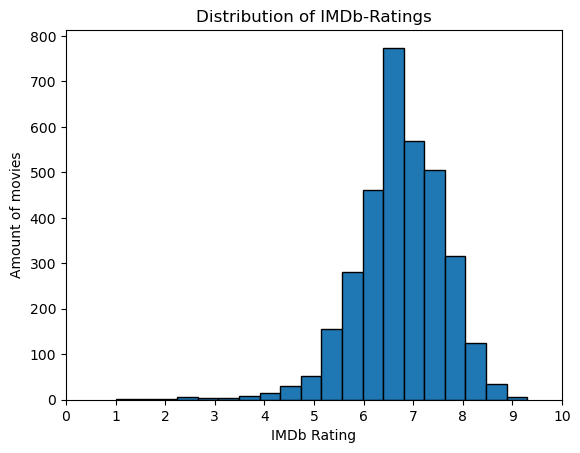

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df["averageRating"], bins=20, edgecolor="black")
plt.xticks(np.arange(0, 11, 1)) 
plt.xlabel("IMDb Rating")
plt.ylabel("Amount of movies")
plt.title("Distribution of IMDb-Ratings")
plt.show()

**Plotting average IMDb rating over time**

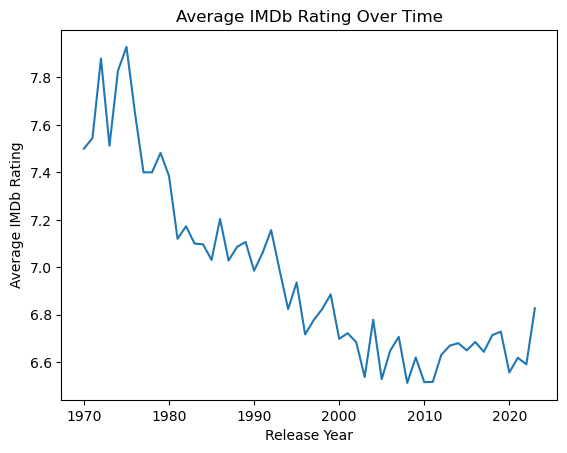

In [45]:
ratings_by_year = (df.groupby("release_year")["averageRating"].mean().dropna())
plt.plot(ratings_by_year.index, ratings_by_year.values)
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating Over Time")
plt.show()

**Plotting average IMDb Rating by genre**

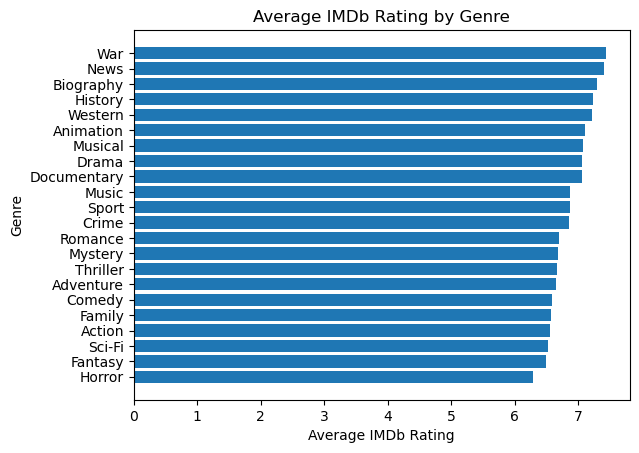

In [46]:
ratings_by_genre = (df_genres.groupby("genre_list")["averageRating"].mean().sort_values())
plt.barh(ratings_by_genre.index, ratings_by_genre.values)
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.title("Average IMDb Rating by Genre")
plt.show()

**Plotting IMDb Rating vs. Popularity**

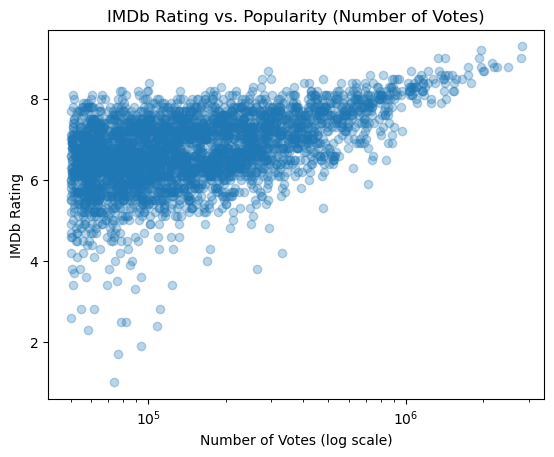

In [47]:
plt.scatter(
    df["numVotes"],
    df["averageRating"],
    alpha=0.3
)

plt.xscale("log")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("IMDb Rating")
plt.title("IMDb Rating vs. Popularity (Number of Votes)")
plt.show()